In [116]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [117]:
def ex_1(A, x_true):
    b = A @ x_true

    condition_number = np.linalg.cond(A, p = 2)
    condition_number_inf = np.linalg.cond(A, p = np.inf)

    x_solve = np.linalg.solve(A, b)
    relative_error = np.linalg.norm(x_true - x_solve, ord=2) / np.linalg.norm(x_true, ord=2)

    return relative_error, condition_number, condition_number_inf

n = 20

A = np.random.rand(n,n)
x_true = np.ones(n)


relative_error, condition_number, condition_number_inf = ex_1(A, x_true)

print(f"The relative error is {relative_error}")
print(f"The condition number K_2(A)={condition_number}")
print(f"The condition number K_inf(A)={condition_number_inf}")


The relative error is 1.9397156336316165e-15
The condition number K_2(A)=1668.2043334285675
The condition number K_inf(A)=3737.8516059482477


<h1>Exercise 1</h1>

In [118]:
def test(generate_matrix, r):

    relative_errors = []
    condition_numbers = []
    condition_numbers_inf = []

    for n in r:
        A = generate_matrix(n)
        x_true = np.ones(n)

        value_n = ex_1(A, x_true)

        relative_errors.append(value_n[0])
        condition_numbers.append(value_n[1])
        condition_numbers_inf.append(value_n[2])


    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(r, relative_errors)
    ax1.grid()
    ax1.set_title("Relative error")

    ax1.set_xlabel("n")
    ax1.set_ylabel("Relative error")



    ax2.plot(r, condition_numbers, label="K_2(A)")
    ax2.plot(r, condition_numbers_inf, label="K_inf(A)")
    ax2.set_title("Condition number")
    ax2.legend()

    ax2.set_xlabel("n")
    ax2.set_ylabel("Condition number")

    plt.grid()
    plt.show()


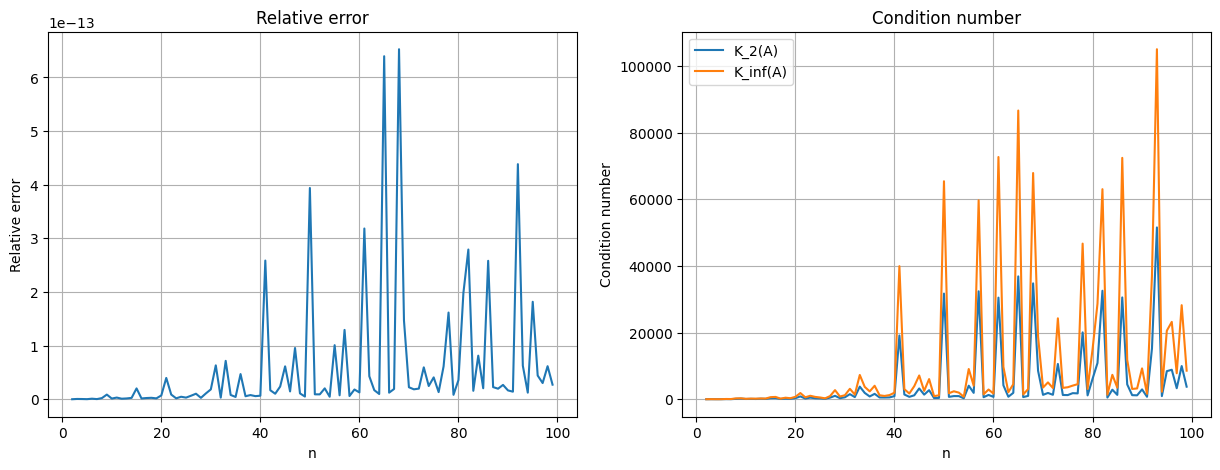

In [119]:
test(lambda n: np.random.rand(n,n), range(2,100))

<h1>Exercise 2</h1>

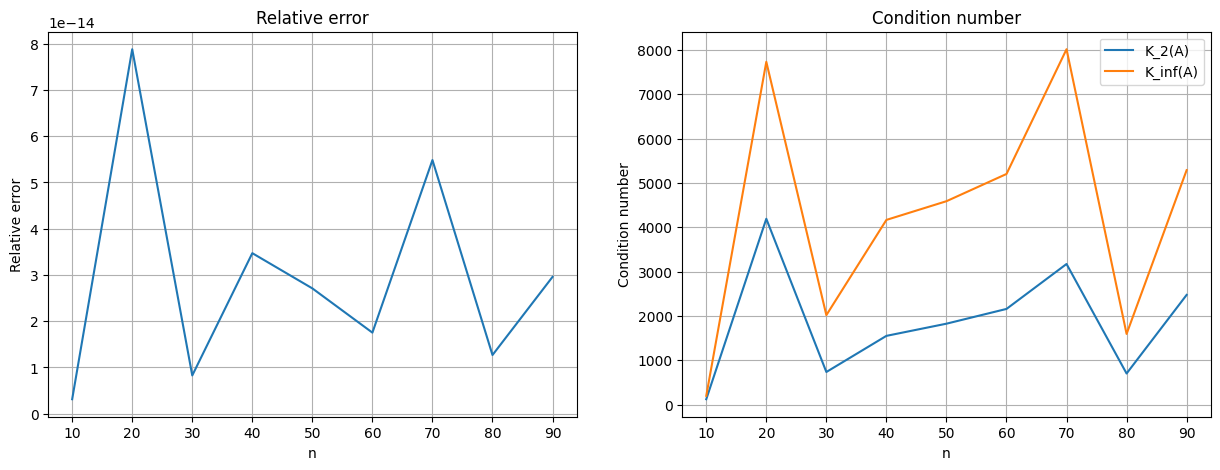

In [120]:
test(lambda n: np.random.rand(n,n), range(10,100, 10))

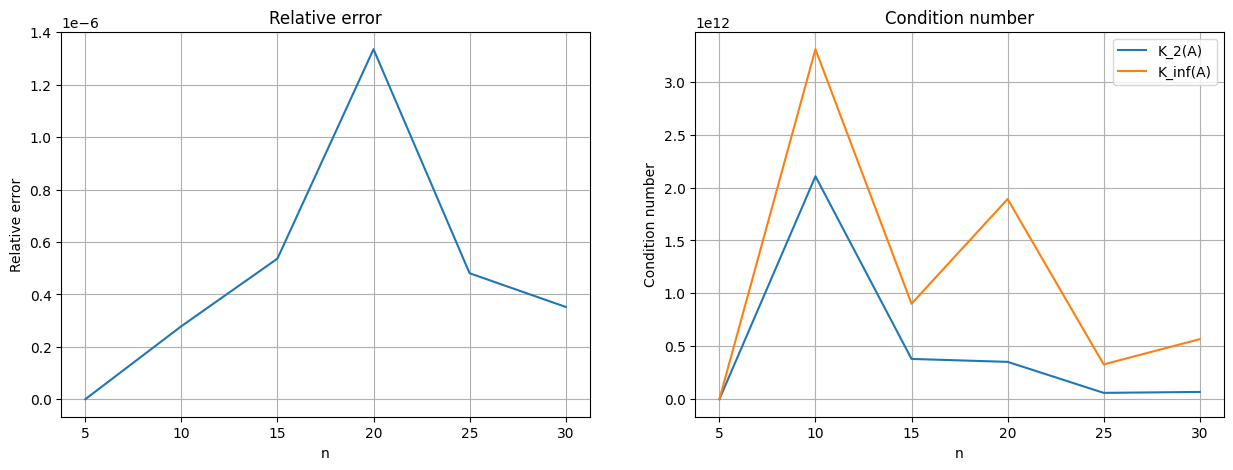

In [131]:
def generate_vander(n):
    x = np.arange(1, n+1)

    return np.vander(x, n)

test(generate_vander, range(5, 31, 5))

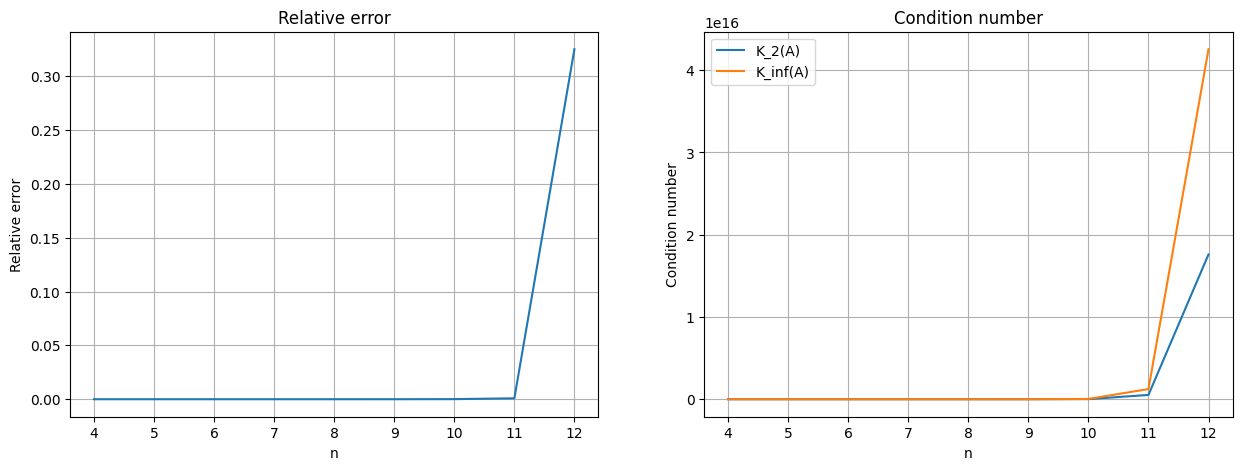

In [122]:
test(lambda n: scipy.linalg.hilbert(n), range(4, 13, 1))

<h1>Exercise 3</h1>

In [123]:
prev_eps = 1
eps = prev_eps

while float(1 + eps) > float(1):
    prev_eps = eps
    eps = float(eps) * float(0.5)

print(prev_eps)



2.220446049250313e-16


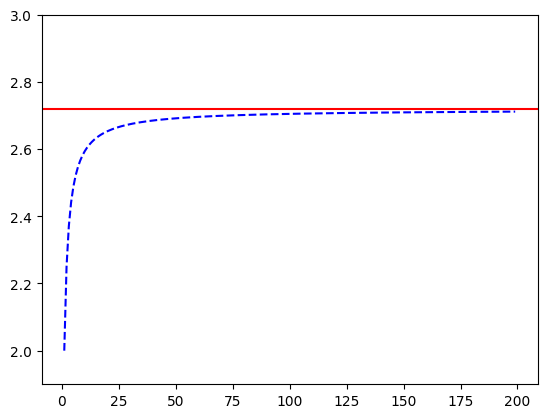

In [124]:
def sequence(n):
    return (1 + 1 / n) ** n

n = range(1, 200)
calculated = list(map(sequence, n))

plt.plot(n, calculated, linestyle="--", color="blue")
plt.axhline(np.e, color="red")

plt.ylim([1.9, 3])

plt.show()

In [132]:
sequence(1e20)

1.0

In [126]:
A = np.array([[4,2], [1,3]])
B = np.array([[4,2], [2,1]])

a_rank = np.linalg.matrix_rank(A)
b_rank = np.linalg.matrix_rank(B)

print(f"Matrix A rank's : {a_rank}")
print(f"Matrix B rank's : {b_rank}")

a_eig = np.linalg.eig(A)[0]
b_eig = np.linalg.eig(B)[0]

print(f"Matrix A eigen values : {a_eig}")
print(f"Matrix B eigen values : {b_eig}")



Matrix A rank's : 2
Matrix B rank's : 1
Matrix A eigen values : [5. 2.]
Matrix B eigen values : [5. 0.]
